## Question 1
*Why Gaussian form of the likelihood is a sensible choice? What does it mean that we have chosen a spherical covariance matrix for the likelihood?*

- - -

The Gaussian form is sensible because we assume that our input data is normally distributed, and in the real world this is often the case. The Central Limit Theorem states that the input is sufficiently large, the random variables become normally distributed.

A spherical covariance matrix means that the matrix is proportional to the identity matrix, such that a variable does not depend on any other variable but itself.

## Question 2
*If we do not assume that the data points are independent how would the likelihood look then? Remember that Y = [y1, . . . , yN ]*

- - -

\begin{align}
p(\mathbf{y}_i \mid f,X) = p(y_1 \mid x_1) p(y_2 \mid x_1 x_2) ... p(y_n \mid x_1 ... x_n)
\end{align}


## Question 3
*What is the form of the likelihood above, complete the right-hand side of the expression.*

- - -

\begin{align}
p(Y \mid X,W) = \prod_{n=1}^N \mathcal{N}(y_n \mid \mathbf{Wx}_n, \sigma^2)
\end{align}

## Question 4
*Explain the concept of conjugate distributions. Why is this a motivated choice?*

- - -

The conjugate prior leads to posterior distributions having the same functional form as the prior. So for example, if the likelihood function is a Gaussian, choosing a prior that is also a Gaussian distribution will result in a posterior distribution that is Gaussian. This leads to a convenient solution and a simplified expression of the posterior. Closed form ???? posterior becomes prior

## Question 5
*The prior in Eq.8 is a spherical Gaussian. This means that the “preference” is
encoded in terms of a L2 distance in the space of the parameters. With this view, how would the
preference change if the preference was rather encoded using a L1 norm? Compare and discuss
the different type of solutions these two priors would encode.*

- - -
An L1 norm means a cubic Gaussian. It leads to a sparse solution where parameters drop toward zero.
Laplace??

## Question 6
*Derive the posterior over the parameters. Please, do these calculations by hand
as it is very good practice. However, in order to pass the assignment you only need to outline
the calculation and highlight the important steps. For simplicity, please make derivations for a
single output variable y. Otherwise, you would have to apply vectorization techniques.*

- *Why does it have the form that it does?*
- *What is the effect of the constant Z, are we interested in this?*


### Posterior: 

\begin{align}
p(\mathbf{w} \mid \mathbf{X}, \mathbf{t}) = \mathcal{N} (\mathbf{\mu_w, \Sigma_w})
\end{align}
where $\mathbf{\mu_w}$ is the mean of $\mathbf{w}$ and $\Sigma_w$ is the covariance matrix.

\begin{align}
p(\mathbf{w} \mid \mathbf{X, t}) ~ e^{-\frac{1}{2} ( \mathbf{w - \mu_w} )^T \Sigma_w (w - \mu_w)}
=
e^{-\frac{1}{2} \mathbf{w^T}\Sigma_w^{-1} \mathbf{w}} * e^{\mathbf{w^T}\Sigma_w^{-1} \mathbf{\mu_w}} * e^{-\frac{1}{2} \mathbf{\mu_w^T} \Sigma^{-1} \mathbf{\mu_w}}
\end{align}



### Likelihood

\begin{align}
p(\mathbf{t} \mid \mathbf{w, X}) = \mathcal{N} (\mathbf{X_w, \sigma^2*I_N})
\end{align}

\begin{align}
p(\mathbf{w} \mid \mathbf{X, t}) \propto p(\mathbf{X,t} \mid \mathbf{w}) * p(\mathbf{w}) = e^{-\frac{1}{2\sigma^2}( \mathbf{t - Xw})^T(\mathbf{t - Xw})} * e^{-\frac{1}{2} \mathbf{w}^T \Sigma^{-1} \mathbf{w}}
\end{align}



The exponent is:
\begin{align}
-\frac{1}{2\sigma^2}(\mathbf{t - Xw})^T(\mathbf{t - Xw}) - \frac{1}{2} \mathbf{w}^T \Sigma^{-1} \mathbf{w}
= -\frac{1}{2\sigma^2} \mathbf{t^Tt} + \frac{1}{\sigma^2} \mathbf{t^TXw} - \frac{1}{2\sigma^2} \mathbf{{Xw}^TXw} - \frac{1}{2} \mathbf{w^T \Sigma^{-1} w}
\end{align}

Three terms:

1. $-\frac{1}{2\sigma^2}\mathbf{t^Tt}$ (constant to w)

2. $\frac{1}{\sigma^2} \mathbf{t^TXw} = \frac{1}{\sigma^2}\mathbf{w^TX^Tt}$ (linear to w)

3. $-\frac{1}{2 \sigma^2} \mathbf{({Xw})^TXw} = -\frac{1}{2}\mathbf{w^T\Sigma^{-1}w} = -\frac{1}{2}\mathbf{w^T}(\frac{1}{\sigma^2}\mathbf{X^TX + \Sigma^{-1})w}$ (quadratic to w)



Comparing against the posterior quadratic term, we get:

$$-\frac{1}{2}\mathbf{w^T}(\frac{1}{\sigma^2}\mathbf{X^TX + \Sigma^{-1}}) = \mathbf{w^T}\Sigma_w^{-1}
\implies \frac{1}{\sigma^2}\mathbf{X^TX} + \Sigma^{-1} = \Sigma_w^{-1}$$

Comparing linear terms:
    
$$\frac{1}{\sigma^2}\mathbf{w^TX^Tt}$$ and $$\mathbf{w^T} \Sigma_\mathbf{w}^{-1} \mu_\mathbf{w}$$

Replacing $\Sigma_\mathbf{w}^{-1}$ we get:
$$\mathbf{w^T} (\frac{1}{\sigma^2} \mathbf{X^TX} + \Sigma^{-1}) \mu_\mathbf{w}$$
$$\implies \mu_\mathbf{w} = \frac{1}{\sigma^2}(\frac{1}{\sigma^2}\mathbf{X^TX} + \Sigma^{-1})^{-1} \mathbf{X^T t}$$

Finally we get:

\begin{align}
p(\mathbf{w \mid X, t}) = \mathcal{N} (\frac{1}{\sigma^2}(\frac{1}{\sigma^2}\mathbf{X^TX} + \Sigma^{-1})^{-1} \mathbf{X^T t}, \frac{1}{\sigma^2}\mathbf{X^TX} + \Sigma^{-1})
\end{align}

The effect of the constant Z is to normalize the probabilities so that they sum to 1.

## Question 7
*What is a non-parametric model and what is the difference between non-parametrics
and parametrics? In specific discuss these two aspects of non-parametrics:*

- *Representability?*
- *Interpretability?*

- - -

In contrast to the parametric model, the non-parametric model does not assume a specific form of distribution. Assumptions can be represented by variables such as the mean and variance. Parametric models are easier to interpret, but might lead to a model that does a poor job of representing the data. Non-parametric models make assumptions about the form of the distribution.
Non-parametric models can usually represent the data better since the models can use the kernel trick to represent data in higher dimensions. This also makes non-parametric models much harder to interpret.

## Question 8
*Explain what this prior does? Why is it a sensible choice? Use images to show
your reasoning. Clue: use the marginal distribution to explain the prior*

- - -

The covariance function says that for similar values of $\mathbf{x}$, the output $\mathcal{f}$ will be similar.

# Question 9
Formulate the joint likelihood of the full model that you have defined above,
$$p(Y, X, f, θ)$$

Try to draw a very simple graphical model to clearly show the assumptions that you have made.

- - -

We can make the assumption that $Y$ is independent of $X$ and $\theta$ given $f$.

$$p(Y, X, f, \theta) = p(Y \mid f) p(\mathcal{f} \mid X, \theta) p(X) p(\theta)$$

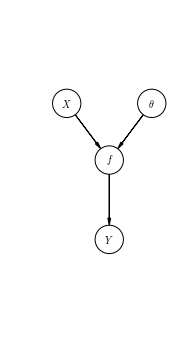

In [221]:
import daft
pgm = daft.PGM([2, 3.05], origin=[0.3, 0.3], grid_unit=[3,4])

# Hierarchical parameters.
pgm.add_node(daft.Node("X", r"$X$", 1, 2.5))
pgm.add_node(daft.Node("theta", r"$\theta$", 2, 2.5))
pgm.add_node(daft.Node("f", r"$f$", 1.5, 2))
pgm.add_node(daft.Node("Y", r"$Y$", 1.5, 1.3))

# Add in the edges.
pgm.add_edge("theta", "f")
pgm.add_edge("X", "f")
pgm.add_edge("f", "Y")

# Render and save.
pgm.render()

## Question 10
*Explain the marginalisation in Eq.12,*
- *Explain how this connects the prior and the data?*
- *How does the uncertainty “filter” through this?*
- *What does it imply that θ is left on the left-hand side of the expression after marginalisation?*

- - -

By marginalizing, we are connecting the prior with the data by giving information to the likelihood of the data. We can say that $f$ determines the probability of $Y$, and is given by $X$ and $\theta$.

The uncertainty is "filtered" through the prior. The more sure we are of the prior, the more data we will need to "correct" the posterior. 

By keeping $\theta$ on the left-hand side, it remains as a hyperparameter.

In [1]:
%matplotlib inline  

import pylab as pl
import numpy as np
from numpy import dot
from numpy.linalg import inv
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
# To sample from a multivariate Gaussian
#f = np.random.multivariate_normal(mu, K);
# To compute a distance matrix between two sets of vectors
#D = cdist(x1, x2)
# To compute the exponetial of all elements in a matrix
#E = np.exp(D)

## Question 11
***
1. Visualise the prior distribution over W.
1. Pick a single data-point from the data and visualise the posterior distribution over W.
1. Sample from the posterior and show a couple of functions.
1. Repeat 2 − 3 by adding additional data points.

Describe the plots and the behavior when adding more data? Is this a desirable behavior?
***

The prior distribution over $\mathbf{W}$ is:
$$p(\mathbf{W}) = \mathcal{N}(W_0, \tau^2\mathbf{I})$$

We have no prior information about the mean and covariance, so we can set $\mathbf{\mu} = [0, 0]$ as it is convenient and symmetrical, and we can assume a large variance, $\Sigma = [[100, 0], [0, 100]]$, illustrated by the following plots.

In [2]:
def get_y(X, W, epsilon=None):
    if epsilon is None:
        epsilon = np.random.normal(0, 0.3, len(X))
    return np.dot(X, W.T) + epsilon

def visualize(distribution, nbins=200):
    H, xedges, yedges = np.histogram2d(distribution[:,0], distribution[:,1], bins=nbins)
    plt.pcolormesh(xedges, yedges, H)

def get_posterior_mean(X, Y, sigma, cov):
    return 1./(sigma**2) * dot(inv(1./(sigma**2) * dot(X.T, X) + inv(cov)), np.dot(X.T, Y))

def get_posterior_sigma(X, sigma, cov):
    return inv(1./(sigma**2) * dot(X.T, X) + inv(cov))

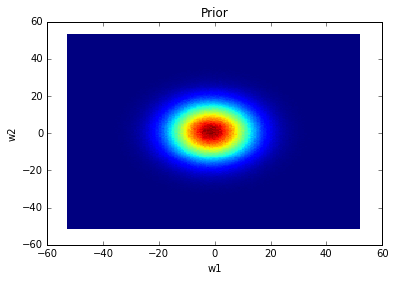

In [176]:
mu = [0, 0]
K = [[100, 0], [0, 100]]
cov = K
sigma = 1
wPrior = np.random.multivariate_normal(mu, K, 10000000)
fig = visualize(wPrior)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Prior')

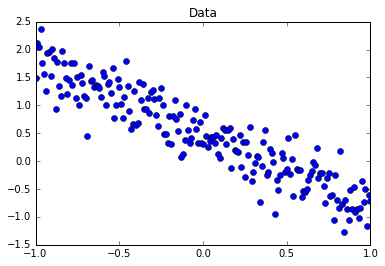

In [4]:
x = np.linspace(-1, 1, 201)
w = np.array([-1.3, 0.5])
X = np.ones((len(x), 2))
W = w
X[:,0] = x
Y = get_y(X, W)
plt.plot(x,Y,'o')
plt.title('Data')

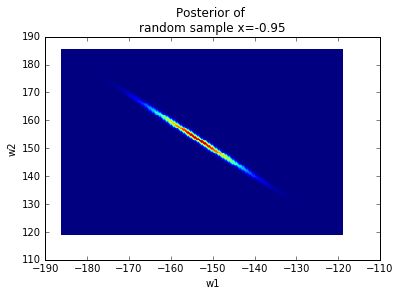

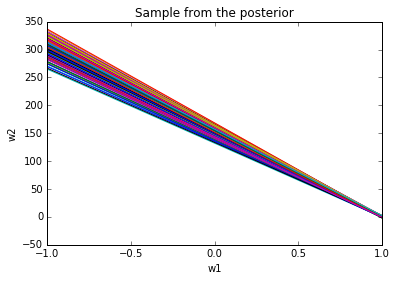

In [5]:
idx = 5
sample = X[idx]
label = np.array(Y[idx])
sigma = 1
#cov = np.eye(2)
posterior_mean = get_posterior_mean(sample, label, sigma, cov)
posterior_sigma = get_posterior_sigma(sample, sigma, cov)
dist = np.random.multivariate_normal(posterior_mean, posterior_sigma, 1000000)
visualize(dist)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Posterior of \nrandom sample x=%.2f' % (sample[0]))
plt.show()

posterior_sample = dist[np.random.randint(0, dist.shape[0], len(x))]
postY = get_y(X, posterior_sample)
plt.plot(x, postY)
plt.title('Sample from the posterior')
plt.xlabel('w1')
plt.ylabel('w2')
plt.show()

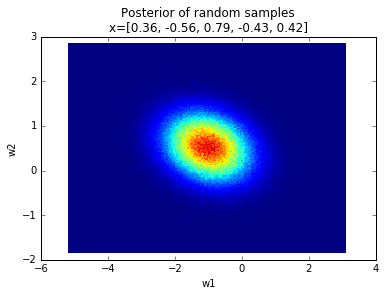

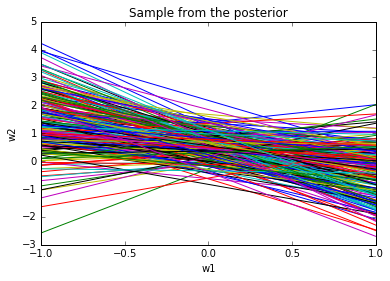

In [6]:
shuffled_idx = np.random.permutation(len(X))
idx = shuffled_idx[:5]
samples = X[idx]
labels = np.array(Y[idx])
posterior_mean = get_posterior_mean(samples, labels, sigma, cov)
posterior_sigma = get_posterior_sigma(samples, sigma, cov)
dist = np.random.multivariate_normal(posterior_mean, posterior_sigma, 1000000)

visualize(dist)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Posterior of random samples\nx=[%s]' % ", ".join(['%.2f' % sample[0] for sample in samples]))
plt.show()

posterior_sample = dist[np.random.randint(0, dist.shape[0], len(x))]
postY = get_y(X, posterior_sample)
plt.plot(x, postY)
plt.title('Sample from the posterior')
plt.xlabel('w1')
plt.ylabel('w2')
plt.show()

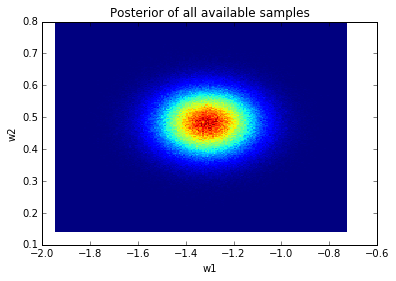

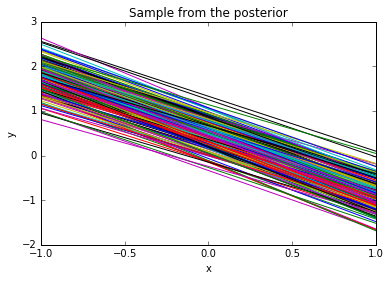

In [126]:
idx = shuffled_idx
samples = X[idx]
labels = np.array(Y[idx])
posterior_mean = get_posterior_mean(samples, labels, sigma, cov)
posterior_sigma = get_posterior_sigma(samples, sigma, cov)
dist = np.random.multivariate_normal(posterior_mean, posterior_sigma, 1000000)
visualize(dist)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Posterior of all available samples')
plt.show()

posterior_sample = dist[np.random.randint(0, dist.shape[0], len(x))]
postY = get_y(X, posterior_sample)
plt.plot(x, postY)
plt.title('Sample from the posterior')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
print np.average(posterior_sample, axis=0)

[-1.3116697   0.48305597]


As we can see, by adding more samples from the data, the parameters converge toward $[-1.3, 0.5]$.

# Question 12
1. Create a GP-prior with a squared exponential co-variance function.
2. Sample from this prior and visualise the samples.
3. Show samples using different length-scale for the squared exponential.

Explain the behavior of altering the length-scale of the covariance function
- - - 

In [260]:
def kernel_function(Xi, Xj, sigma, l):
    k = sigma**2 * np.exp(-cdist(Xi, Xj, 'sqeuclidean')/l**2)
    return k

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: covariance is not positive-semidefinite.


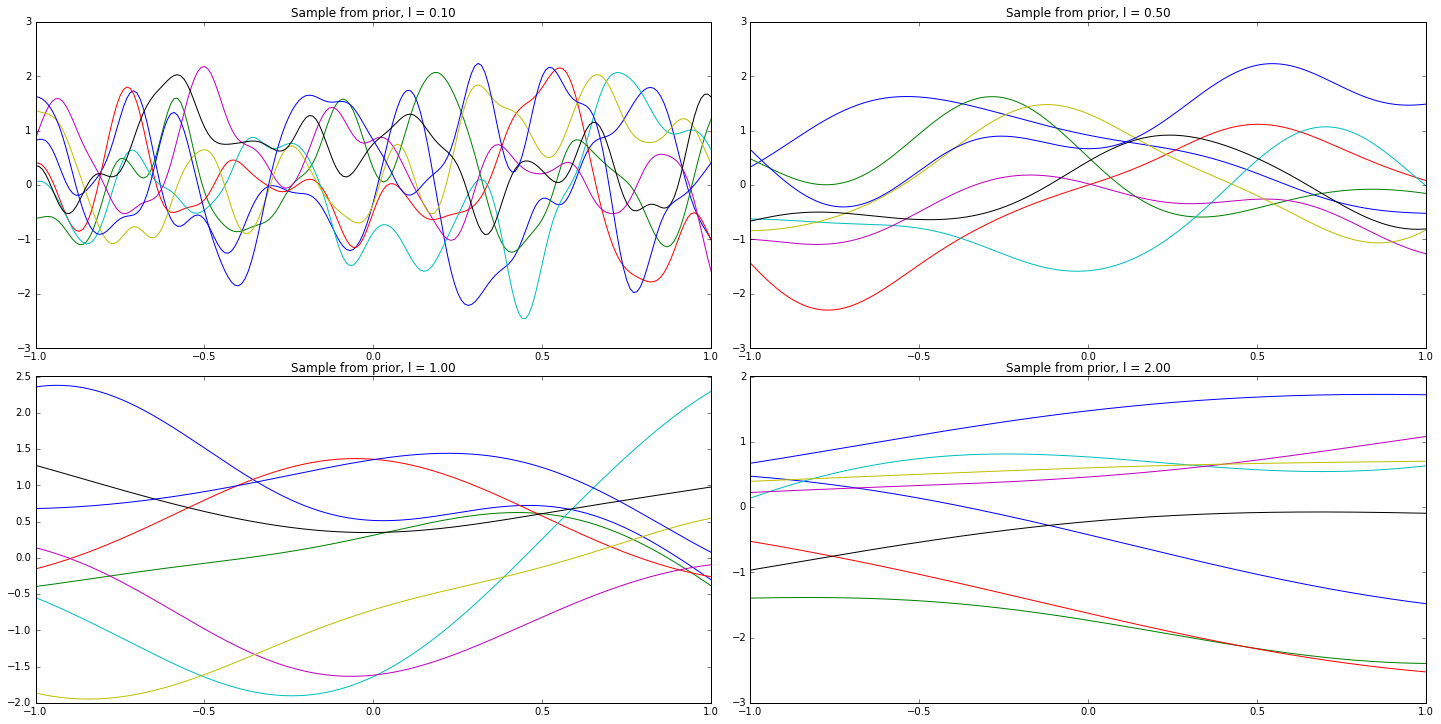

In [261]:
sigma = 1
X_GP = X
L = [0.1, 0.5, 1., 2.]
fig, axarr = plt.subplots(2,2, figsize=(20, 10));
plt.tight_layout()
for row in range(2):
    for col in range(2):
        l = L[row*2+col]
        K_GP = kernel_function(X_GP, X_GP, sigma, l)
        mu_GP = np.zeros(len(K_GP))
        for _ in xrange(8):
            prior_dist_GP = np.random.multivariate_normal(mu_GP, K_GP)    
            axarr[row,col].plot(X_GP[:,0], prior_dist_GP)
            axarr[row,col].set_title('Sample from prior, l = %.2f' % l)
plt.show()

A high $l$-value means the curves are smoother. The $l$-value is a constraint between points that define how closely they correlate. A large $l$-value means that the distance between the points matters less.

# Question 13
>The posterior and the prior are the same object if we do not have any
observed data.

Explain the above statement, why is this?

- - - 


The prior is the information we have before we know the posterior. The prior reflects the subjective beliefs about some phenomena. By updating the prior with gathered data, we obtain the posterior using Bayes' theorem. If the prior is uninformative, the posterior will be purely based on data. On the other hand, if the prior is informative, the posterior will be a mixture of the prior and the data. If we don't have any data at all, the prior and the posterior will thus be the same object.

# Question 14
1. Compute the predictive posterior distribution of the model
2. Sample from this posterior with points both close to the data and far away from the observed
data.
3. Plot the data, the predictive mean and the predictive variance of the posterior from the
data.

Explain the behavior of the samples and compare the samples of the posterior with the ones from
the prior. Is this behavior desirable? What would happen if you would add a diagonal covariance
matrix to the squared exponential?

- - -

You can see that within the range $[-\pi, ..., \pi]$, the model fits the data very well. 

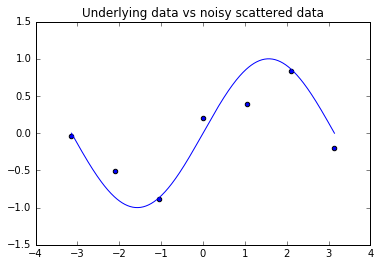

In [262]:
x_sin = np.linspace(-pi, pi, 7)
epsilon = np.random.normal(0, 0.5, len(x_sin))
y_sin = np.sin(x_sin) + epsilon
X_sin = np.zeros((len(x_sin), 2))
X_sin[:,0] = x_sin
plt.scatter(x_sin, y_sin)

x_sin_true = np.linspace(-pi, pi, 400)
y_sin_true = np.sin(x_sin_true)
plt.plot(x_sin_true, y_sin_true, 'b')
plt.title('Underlying data vs noisy scattered data')

In [263]:
def get_gp_mean_cov(train, train_label, test, sigma=1, l=0.5):
    C = kernel_function(train, train, sigma, l)
    k = kernel_function(train, test, sigma, l)
    c = kernel_function(test, test, sigma, l)
    
    mu_gp = dot(dot(k.T, inv(C)), train_label)
    cov_gp = c - dot(dot(k.T, inv(C)), k)
    return mu_gp, cov_gp
    
mu_gp, cov_gp = get_gp_mean_cov(X_sin, y_sin, X_sin)
predictive_posterior = np.random.multivariate_normal(mu_gp, cov_gp)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: covariance is not positive-semidefinite.


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: covariance is not positive-semidefinite.


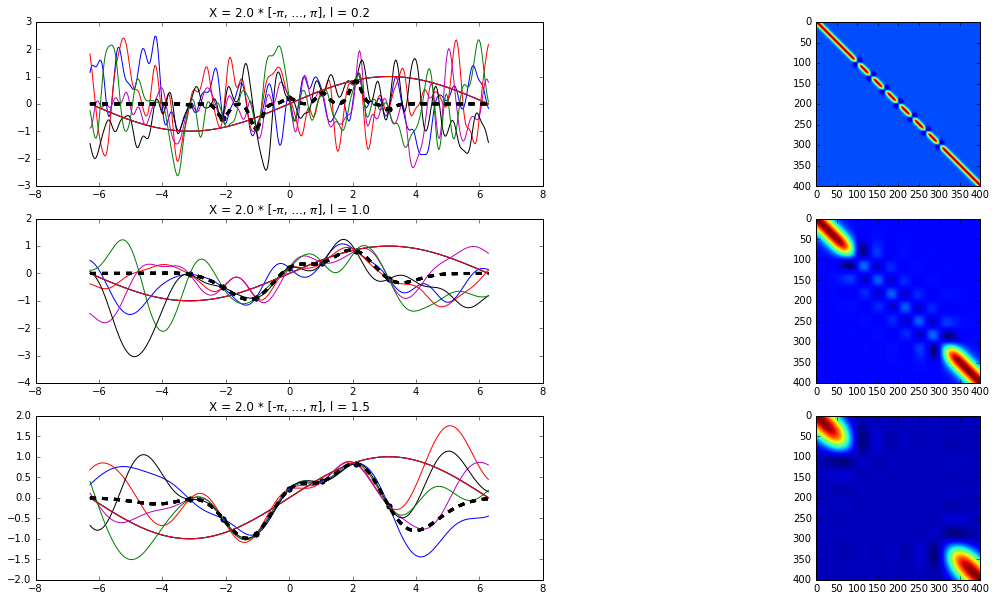

In [264]:
scale = 2
x_sin_test = x_sin_true * scale
L = [0.25, 1.0, 1.5]
X_sin_test = np.column_stack((x_sin_test, np.zeros(len(x_sin_test))))
rows = len(L)
cols = 2
fig, axarr = plt.subplots(rows, cols, figsize=(20, 10));
for row in xrange(rows):
    l = L[row]
    mu_gp, cov_gp = get_gp_mean_cov(X_sin, y_sin, X_sin_test, sigma=1, l=l)
    for _ in xrange(5):
        dist = np.random.multivariate_normal(mu_gp, cov_gp)
        axarr[row,0].plot(x_sin_test, dist)
        axarr[row,0].scatter(x_sin, y_sin)
        axarr[row,0].plot(x_sin_test, y_sin_true)
        axarr[row,0].set_title(u'X = %.1f * [-\u03C0, ..., \u03C0], l = %.1f' % (scale, l))
        axarr[row,0].plot(x_sin_test, mu_gp, 'k--', linewidth=3, label='mean')
    axarr[row,1].imshow(cov_gp)
    #plt.fill_between(x_sin_true, mu_gp - np.diagonal(cov_gp), mu_gp + np.diagonal(cov_gp), alpha=0.2)



# II The Posterior $p(\mathbf{X} \mid \mathbf{Y})$

## Question 15
Elaborate on this, why can one view a prior as encoding a preference?
- - - 
A prior encodes a preference in the sense that the more informative the prior, the more data we need to change our beliefs since the posterior becomes more influenced by the prior. That is to say that we prefer a specific model more than other models.

## Question 16
$$p(\mathbf{X} \mid = \mathcal{N}(0, \mathcal{I})$$
What type of _"preference"_ does this prior encode?
- - - 
This prior encodes a preference for symmetrical data centered around the origin. The variance of the
Gaussian is inversely related to the strength of the evidence in favor of the prior mean. 

## Question 17
Perform the marginalisation in Eq. 23 and write down the expression. As previously,
it is recommended that you do this by hand even though you only need to outline the
calculations and show the approach that you would take to pass the assignment.
Hint: The marginal can be computed by integrating out X with the use of Gaussian algebra
we exploited in the exercise derivations and, in particular, by completing the square. However it
is much easier to derive the mean and covariance, knowing that the marginal is Gaussian, from
the linear equation of Y(X).

- - -



## Question 18
Compare these three estimation procedures above in log-space.
- How are they different?
- How are MAP and ML different when we observe more data?
- Why are the two last expressions of Eq. 25 equal?

- - -

